In [1]:
# DEAP package GP example
# Quoted from https://github.com/DEAP/deap/blob/f4b77759897d0322ab5a6551106b28f6f4401a4e/examples/gp/symbreg.py code

import operator
import math
import random

import numpy

from deap import algorithms, base, creator, gp, tools

# Define new functions for (𝑥4+𝑥3+𝑥2+𝑥)
# 20 equidistant points are generated in the range [-1, 1], and are used to evaluate the fitness
 
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)
pset.addEphemeralConstant("rand102", lambda: random.randint(-1,1))
pset.renameArguments(ARG0='x')

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)
    # Evaluate the mean squared error between the expression
    # and the real function : x**4 + x**3 + x**2 + x
    sqerrors = ((func(x) - x**4 - x**3 - x**2 - x)**2 for x in points)
    return math.fsum(sqerrors) / len(points),

toolbox.register("evaluate", evalSymbReg, points=[x/10. for x in range(-10,10)])
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

def main():
    random.seed(318)

    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    
    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", numpy.mean)
    mstats.register("std", numpy.std)
    mstats.register("min", numpy.min)
    mstats.register("max", numpy.max)

    pop, log = algorithms.eaSimple(pop, toolbox, 0.5, 0.1, 40, stats=mstats,
                                   halloffame=hof, verbose=True)
    # print log
    return pop, log, hof

if __name__ == "__main__":
    main()

   	      	                        fitness                        	                      size                     
   	      	-------------------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max  	min     	nevals	std    	avg    	gen	max	min	nevals	std    
0  	300   	1.78879	0  	30.34	0.450825	300   	2.67896	3.54667	0  	7  	2  	300   	1.49482
1  	166   	1.43254	1  	44.4437	0.183711	166   	3.05668	3.60667	1  	12 	1  	166   	1.77725
2  	166   	2.16879	2  	315.736	0.165572	166   	18.1873	3.55   	2  	9  	1  	166   	1.62506
3  	163   	0.98255	3  	2.9829 	0.165572	163   	0.712666	3.42667	3  	9  	1  	163   	1.45073
4  	153   	0.836017	4  	14.538 	0.165572	153   	0.979399	3.77   	4  	11 	1  	153   	1.64025
5  	158   	0.944635	5  	18.9739	0.165572	158   	1.61614 	3.77667	5  	10 	1  	158   	1.62894
6  	169   	0.885819	6  	14.2181	0.165572	169   	1.00296 	4      	6  	10 	1  	169   	1.87617
7  	167   	0.731332	7  	3.35292	0.165572	167   

In [3]:
logbook = tools.Logbook()
gen = logbook.select("gen")


fit_mins = logbook.chapters["fitness"].select("min")
fit_mins
# size_avgs = logbook.chapters["size"].select("avg")

# import matplotlib.pyplot as plt

# fig, ax1 = plt.subplots()
# line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
# ax1.set_xlabel("Generation")
# ax1.set_ylabel("Fitness", color="b")
# for tl in ax1.get_yticklabels():
#     tl.set_color("b")

# ax2 = ax1.twinx()
# line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
# ax2.set_ylabel("Size", color="r")
# for tl in ax2.get_yticklabels():
#     tl.set_color("r")

# lns = line1 + line2
# labs = [l.get_label() for l in lns]
# ax1.legend(lns, labs, loc="center right")

# plt.show()


# import matplotlib.pyplot as plt
# import networkx

# nodes, edges, labels = gp.graph(bests[0])
# graph = networkx.Graph()
# graph.add_nodes_from(nodes)
# graph.add_edges_from(edges)
# #pos = graphviz_layout(graph, prog='dot')
# pos = nx.nx_agraph.graphviz_layout(graph, prog="dot")

# plt.figure(figsize=(7,7))
# networkx.draw_networkx_nodes(graph, pos, node_size=900, node_color="w")
# networkx.draw_networkx_edges(graph, pos)
# networkx.draw_networkx_labels(graph, pos, labels)
# plt.axis("off")
# plt.show()

[]

In [1]:
# GPLearn package example by https://medium.com/analytics-vidhya/python-symbolic-regression-with-gplearn-cbc24dbbc271
import numpy as np
import pandas as pd
from pylab import *

# Initialize a linear x, a sin(x) and x**3
nsample = 400
sig = 0.2
x = np.linspace(-50, 50, nsample)
X = np.column_stack((x/5, 10*np.sin(x), (x-5)**3, np.ones(nsample)))
beta = [0.01, 1, 0.001, 5.]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)
df = pd.DataFrame()
df['x']=x
df['y']=y


from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sympy import *

X = df[['x']]
y = df['y']
y_true = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [50]:
# First Test
function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv']
est_gp = SymbolicRegressor(population_size=5000,function_set=function_set,
                           generations=40, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0,
                          feature_names=X_train.columns)

converter = {
    'sub': lambda x, y : x - y,
    'div': lambda x, y : x/y,
    'mul': lambda x, y : x*y,
    'add': lambda x, y : x + y,
    'neg': lambda x    : -x,
    'pow': lambda x, y : x**y,
    'sin': lambda x    : sin(x),
    'cos': lambda x    : cos(x),
    'inv': lambda x: 1/x,
    'sqrt': lambda x: x**0.5,
    'pow3': lambda x: x**3
}

est_gp.fit(X_train, y_train)
print('R2:',est_gp.score(X_test,y_test))
next_e = sympify(str(est_gp._program), locals=converter)
# To show output
# next_e

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.94          3204.28       26          16.2527          24.4466      1.84m
   1    11.69          514.972       11          15.9006          26.2996      1.86m
   2     9.03          78.1709        5          15.6261          34.1239      1.40m
   3     8.70          64.8289        8          15.6951          27.8534      1.35m
   4     8.61          49.4969        9          15.5036          30.6667      1.29m
   5     9.21          59.2284       10          15.2252          33.5069      1.21m
   6     9.26          43.1742       26          15.5277          28.8318      1.16m
   7     9.43          68.4036        9          15.5605          30.4311      1.18m
   8     9.10          53.1477       12          15.2942          30.8366  

x - 4.62141378290447*(0.003021*x**2 - 0.112*x + 0.097552)*sin(0.112*x + 0.112*sin(-0.112*x + cos(sin(1/x)) + 0.097552)) + 6.06060606060606*sin(0.165*x) + 12.1212121212121*sin(x) - 6.06060606060606*sin(0.112*x - 0.097552) - 6.06060606060606*sin(sin(0.112*x - 0.097552) - cos(0.165*x)) - 2.421

In [84]:
# Comparison with external tools
est_tree = DecisionTreeRegressor(max_depth=5)
est_tree.fit(X_train, y_train)
est_rf = RandomForestRegressor(n_estimators=100,max_depth=5)
est_rf.fit(X_train, y_train)
y_gp = est_gp.predict(X_test)
score_gp = est_gp.score(X_test, y_test)
y_tree = est_tree.predict(X_test)
score_tree = est_tree.score(X_test, y_test)
y_rf = est_rf.predict(X_test)
score_rf = est_rf.score(X_test, y_test)


In [85]:
# For later usage
from matplotlib import pyplot
import matplotlib as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as pl

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

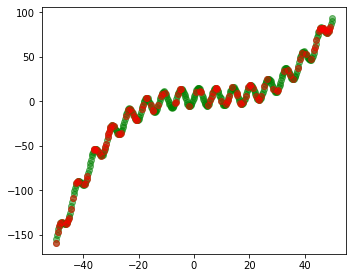

In [98]:
# Create dataframe
df2 = pd.DataFrame(columns=list('xys'))
fig = pl.figure(figsize=(12, 10))
for i, (y, score, title) in enumerate([(y_test, None, "Ground Truth"),(y_gp, score_gp, "Symbolic Regressor"),(y_tree, score_tree, "Decision Tree Regressor"),(y_rf, score_rf, "Random Forest Regressor")]):
    ax = fig.add_subplot(2, 2, i+1)
    points = ax.scatter(X, y_true, color='green', alpha=0.5)
    test = ax.scatter(X_test,y,color='red', alpha=0.5)
    data = pd.DataFrame({'x': [X,X_test], 'y':[y_true,y], 's':['points','test']})
    df2 = pd.concat(df2, data)
    pl.title(title)
pl.show()

fig = px.scatter(df)
df2

In [57]:
figure = px.scatter(df, )

ValueError: All arguments should have the same length. The length of argument `y` is 120, whereas the length of  previously-processed arguments ['x'] is 400

In [35]:
from gplearn.functions import make_function
def pow_3(x1):
    f = x1**3
    return f
pow_3 = make_function(function=pow_3,name='pow3',arity=1)
# add the new function to the function_set
function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv',pow_3]
est_gp = SymbolicRegressor(population_size=5000,function_set=function_set,
                           generations=45, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0,
                          feature_names=X_train.columns)
est_gp.fit(X_train, y_train)
print('R2:',est_gp.score(X_test,y_test))
next_e = sympify(str(est_gp._program), locals=converter)
next_e

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.13       2.8592e+61       22          16.2673          27.9061      1.77m
   1    10.70      2.35374e+42       20           13.864          16.0781      2.23m
   2     9.09      8.16763e+13       19           13.503          21.5125      2.25m
   3     8.25      6.89542e+55       20           13.629          18.1938      2.55m
   4     9.50      3.44649e+21       22          13.2495          20.9616      2.31m
   5    14.80      1.10938e+46       25          13.1611          13.4281      2.10m
   6    20.10      1.09321e+46       19          11.3216           12.191      3.07m
   7    22.27      5.19681e+45       25          10.9789          10.6406      2.72m
   8    24.01      5.82118e+45       17          10.5668          12.6584  

0.0169991811784987*x + 0.10830968746125*(0.210553473530698*x - 1)**3 + 10.1864674186787*sin(x) + 4.26684684643321

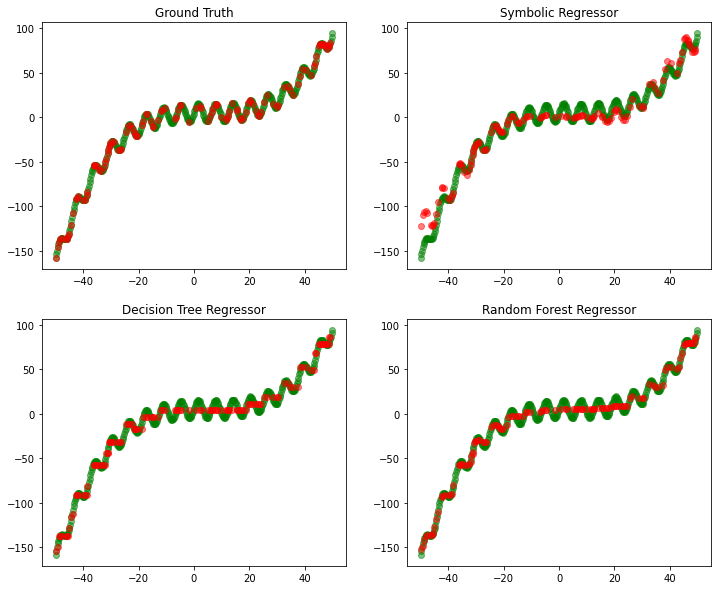

In [36]:
fig = pl.figure(figsize=(12, 10))
for i, (y, score, title) in enumerate([(y_test, None, "Ground Truth"),(y_gp, score_gp, "Symbolic Regressor"),(y_tree, score_tree, "Decision Tree Regressor"),(y_rf, score_rf, "Random Forest Regressor")]):
    ax = fig.add_subplot(2, 2, i+1)
    points = ax.scatter(X, y_true, color='green', alpha=0.5)
    test = ax.scatter(X_test,y,color='red', alpha=0.5)
    pl.title(title)
pl.show() 

In [41]:
import numpy as np
import ffx

train_X = np.array( [ (1.5,2,3), (4,5,6) ] ).T
train_y = np.array( [1,2,3])

test_X = np.array( [ (5.241,1.23, 3.125), (1.1,0.124,0.391) ] ).T
test_y = np.array( [3.03,0.9113,1.823])

models = ffx.run(train_X, train_y, test_X, test_y, ["predictor_a", "predictor_b"])
for model in models:
    yhat = model.simulate(test_X)
    print(model)

2.00
1.85 + 0.0302*predictor_b
1.76 + 0.0720*log10(predictor_b) + 0.0389*predictor_b
1.72 - 0.0796*max(0,2.60-predictor_a) + 0.0705*predictor_b - 0.0701*max(0,2.40-predictor_a)
1.71 - 0.0875*max(0,2.60-predictor_a) - 0.0796*max(0,2.40-predictor_a) + 0.0748*predictor_b - 0.000532*max(0,5.73-predictor_b)
(1.72 - 0.0802*max(0,2.60-predictor_a) - 0.0751*max(0,2.40-predictor_a) + 0.0714*predictor_b) / (1.0 + 0.0142*max(0,2.20-predictor_a) - 0.000721*predictor_b)
(1.71 - 0.0883*max(0,2.60-predictor_a) - 0.0862*max(0,2.40-predictor_a) + 0.0763*predictor_b - 0.00449*max(0,5.73-predictor_b)) / (1.0 + 0.0260*max(0,2.20-predictor_a) - 0.00130*predictor_b)
(1.75 + 0.0319*predictor_b + 0.0318*predictor_b - 0.0106*max(0,2.60-predictor_a) - 0.00616*predictor_b * max(0,5.73-predictor_b) + 2.53e-5*predictor_b^2 + 2.22e-5*predictor_b^2) / (1.0 + 0.0586*max(0,2.60-predictor_a) * max(0,2.40-predictor_a) + 0.0138*max(0,5.73-predictor_b) * max(0,2.60-predictor_a))


In [42]:
import numpy as np
import ffx

# This creates a dataset of 2 predictors
X = np.random.random((20, 2))
y = 0.1 * X[:, 0] + 0.5 * X[:, 1]

train_X, test_X = X[:10], X[10:]
train_y, test_y = y[:10], y[10:]

FFX = ffx.FFXRegressor()
FFX.fit(train_X, train_y)
print("Prediction:", FFX.predict(test_X))
print("Score:", FFX.score(test_X, test_y))

Prediction: [0.26337742 0.39380649 0.39776912 0.45435442 0.13256023 0.21573215
 0.06495785 0.2953916  0.23246304 0.48556717]
Score: 0.9994305092965221


ModuleNotFoundError: No module named 'RecursiveSymbolicRegression'

In [3]:
import argparse
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import sys
import operator
import math

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.sparse import csr_matrix

# EFSRegressor estimator
from efs import EFSRegressor

# Graphs
import matplotlib.pyplot as plt
import seaborn as sb

# Potential dataset
from pmlb import fetch_data

# Target formula:
def target(x):
    return x**4 + x**3 + x**2 + x
    
def main(POP, MAXG, DATFILE):
    random.seed(0)
    
    # This creates a dataset of 2 predictors
    X = np.random.random((POP, 2))
    y = target(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    sr = EFSRegressor(max_gens=MAXG)
    sr.fit(X_train, y_train)
    score = sr.score(X_test, y_test)

    # line =plt.plot(num_features)
    # plt.show()
    

    with open(DATFILE, 'w') as f:
        f.write(str(score*100))


if __name__ == "__main__":
    # just check if args are ok
    with open('args.txt', 'w') as f:
        f.write(str(sys.argv))
        
    ap = argparse.ArgumentParser(description='Feature Selection using GP with DEAP')
    ap.add_argument("-v", "--verbose", help="increase output verbosity", action="store_true")
    ap.add_argument('--pop', dest='pop', type=int, required=True, help='Population size')
    ap.add_argument('--max_generation', dest='max_generation', type=int, required=True, help='Maximum generations')
    ap.add_argument('--datfile', dest='datfile', type=str, required=True, help='File where it will be save the score (result)')

    args = ap.parse_args()

    if args.verbose:
        logging.basicConfig(level=logging.DEBUG)

    logging.debug(args)

    main(args.pop, args.max_generation, args.datfile)
    

#import pygraphviz as pgv
#
## [...] Execution of code that produce a tree expression
#
#nodes, edges, labels = graph(expr)
#
#g = pgv.AGraph()
#g.add_nodes_from(nodes)
#g.add_edges_from(edges)
#g.layout(prog="dot")
#
#for i in nodes:
#    n = g.get_node(i)
#    n.attr["label"] = labels[i]
#
#g.draw("tree.pdf")


ImportError: cannot import name 'EFSRegressor' from 'efs' (/opt/anaconda3/lib/python3.8/site-packages/efs/__init__.py)

Note: you may need to restart the kernel to use updated packages.


In [8]:
from efs import evolutionary_feature_synthesis


ImportError: cannot import name 'evolutionary_feature_synthesis' from 'efs' (/opt/anaconda3/lib/python3.8/site-packages/efs/__init__.py)

In [4]:
import argparse
import logging
import matplotlib.pyplot as plt
from multiprocess import Pool
import numpy as np
import pandas as pd
import random
import sys
import operator
import math

from scipy.sparse import csr_matrix
#from scoop import futures
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import graphviz

# Graphs and dataset
import matplotlib.pyplot as plt
import seaborn as sb
from pmlb import fetch_data

# Target formula:
def target(x):
    return x**4 + x**3 + x**2 + x

# SCOOP
#toolbox.register("map", futures.map)
def main(POP, CXPB, MUTPB):

    # This creates a dataset of 2 predictors
    X = np.random.random((POP, 2))
    y = target(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # line =plt.plot(graph)
    # plt.show()

    # line =plt.plot(num_features)
    # plt.show()
    
    # First Test
    function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv']
    est_gp = SymbolicRegressor(population_size=POP,function_set=function_set,
                               generations=40, stopping_criteria=0.01,
                               p_crossover=CXPB, p_point_mutation= MUTPB,
                               max_samples=0.9, verbose=1,
                               parsimony_coefficient=0.01, random_state=42)

    converter = {
        'sub': lambda x, y : x - y,
        'div': lambda x, y : x/y,
        'mul': lambda x, y : x*y,
        'add': lambda x, y : x + y,
        'neg': lambda x    : -x,
        'pow': lambda x, y : x**y,
        'sin': lambda x    : sin(x),
        'cos': lambda x    : cos(x),
        'inv': lambda x: 1/x,
        'sqrt': lambda x: x**0.5,
        'pow3': lambda x: x**3
    }

    est_gp.fit(X_train, y_train)
    print('R2:',est_gp.score(X_test,y_test))
    next_e = sympify(str(est_gp._program), locals=converter)
    next_e

    
if __name__ == "__main__":
    main(5000,0.7,0.1)
    

ValueError: y should be a 1d array, got an array of shape (3750, 2) instead.

NameError: name 'next_e' is not defined